In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Data/WineQT.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


<Axes: >

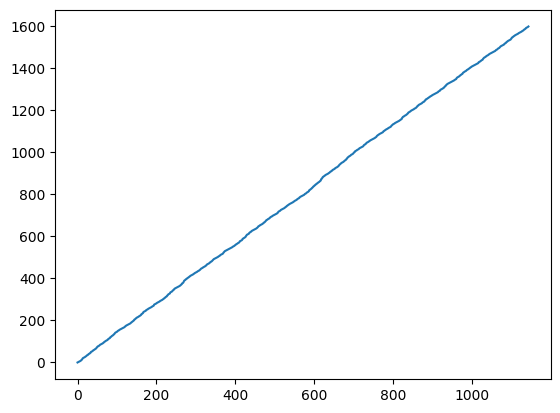

In [6]:
data["Id"].plot()

In [7]:
data = data.drop(["Id"] ,axis = 1)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [9]:
def change(x):
  if x == 3:
    return 0
  elif x == 4:
    return 1
  elif x == 5:
    return 2
  elif x == 6:
    return 3
  elif x == 7:
    return 4
  elif x == 8:
    return 5

data["quality"] = data["quality"].apply(change)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,3
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3


In [10]:
data["quality"].unique()

array([2, 3, 4, 1, 5, 0])

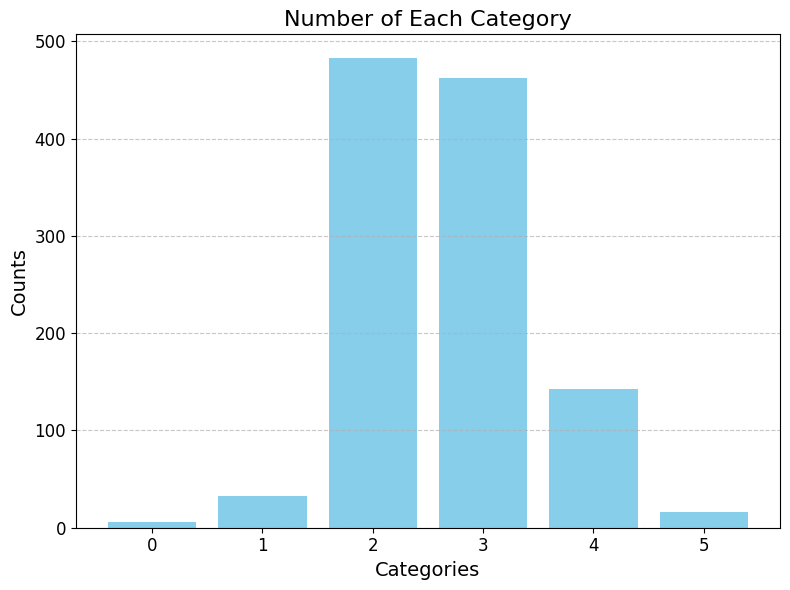

In [11]:
category_counts = data["quality"].value_counts()


plt.figure(figsize=(8, 6))  # Adjusting figure size
plt.bar(category_counts.index, category_counts.values, color='skyblue')  # Changing bar color
plt.xlabel('Categories', fontsize=14)  # Setting x-axis label and fontsize
plt.ylabel('Counts', fontsize=14)  # Setting y-axis label and fontsize
plt.title('Number of Each Category', fontsize=16)  # Setting title and fontsize
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines
plt.xticks(fontsize=12)  # Setting x-tick label fontsize
plt.yticks(fontsize=12)  # Setting y-tick label fontsize
plt.tight_layout()  # Adjusting layout
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(["quality"], axis = 1), data["quality"], test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [14]:
X_train

array([[ 0.1426802 , -1.40273053,  1.5096933 , ..., -0.09314751,
         0.56821234,  0.05661327],
       [ 0.96843134, -1.17920341,  1.5096933 , ..., -1.07474038,
         0.4477703 ,  0.89445566],
       [ 0.3786091 , -1.23508519,  0.4833938 , ...,  0.56124774,
         0.20688622,  1.26683005],
       ...,
       [-0.50612428, -1.01155806,  0.32944888, ...,  0.29948964,
        -0.33510296,  1.35992365],
       [-0.21121315,  0.21784112,  0.22681893, ..., -0.15858703,
         0.20688622, -0.87432272],
       [-0.44714205, -0.06156778,  0.6886537 , ..., -0.35490561,
        -0.09421888,  1.26683005]])

In [15]:
X_train.shape

(914, 11)

In [16]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


In [17]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.00001):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.biases_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.biases_hidden_output = np.zeros((1, self.output_size))

    def forward(self, inputs):
        # Forward pass
        self.hidden = np.dot(inputs, self.weights_input_hidden) + self.biases_input_hidden
        self.hidden_activation = self.relu(self.hidden)

        self.output = np.dot(self.hidden_activation, self.weights_hidden_output) + self.biases_hidden_output
        self.output_activation = self.softmax(self.output)

        return self.output_activation

    def backward(self, inputs, targets):
            # Backpropagation
            # Calculate output layer error
            output_error = self.output_activation - targets
            output_delta = output_error

            # Update output layer weights and biases
            self.weights_hidden_output -= np.dot(self.hidden_activation.T, output_delta) * self.learning_rate
            self.biases_hidden_output -= np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate

            # Calculate hidden layer error
            hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
            hidden_delta = hidden_error * self.relu_derivative(self.hidden_activation)
            #self.hidden_activation * (1 - self.hidden_activation)
             #(self.relu_derivative(self.hidden))

            # Update hidden layer weights and biases
            self.weights_input_hidden -= np.dot(inputs.T, hidden_delta) * self.learning_rate
            self.biases_input_hidden -= np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate


    def train(self, inputs, targets, epochs, X_test=None, y_test=None):
        targets = targets.to_numpy()
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(inputs)

            # Backward pass
            self.backward(inputs, targets)

               # Compute evaluation metrics if test data is provided
            if X_test is not None and y_test is not None:
                y_pred = np.argmax(self.forward(X_test), axis=1)
                acc = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted')
                recall = recall_score(y_test, y_pred, average='weighted')
                f1 = f1_score(y_test, y_pred, average='weighted')
                loss = self.mean_squared_error(targets, output)
                print(f'Epoch {epoch+1}/{epochs}, Acc: {acc}, Precision: {precision}, Recall: {recall}, F1: {f1}, Loss: {loss}')
            else:
                print(f'Epoch {epoch+1}/{epochs}')

    def tanh(self, x):
        return np.tanh(x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def derivative_tanh(self, x):
        return 1 - np.tanh(x) ** 2

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def mean_squared_error(self, targets, predictions):
        return np.mean(np.square(targets - predictions))

    def cross_entropy_loss(self, targets, output):
        # Calculate cross-entropy loss
        num_samples = targets.shape[0]
        loss = -np.sum(targets * np.log(output)) / num_samples
        #print(targets * np.log(output))
        print(num_samples)
        return loss

    def test(self, inputs, targets):
      # Forward pass
      output = self.forward(inputs)

      # Convert output to class labels
      predicted_labels = np.argmax(output, axis=1)

      # Compute metrics
      accuracy = accuracy_score(targets, predicted_labels)
      precision = precision_score(targets, predicted_labels, average='macro')
      recall = recall_score(targets, predicted_labels, average='macro')
      f1 = f1_score(targets, predicted_labels, average='macro')

      return accuracy, precision, recall, f1

# Define dimensions
input_size = 11
hidden_size = 18
output_size = 6

# Create MLP
mlp = MLP(input_size, hidden_size, output_size)

# Train the MLP
y_train_n = pd.get_dummies(y_train)

mlp.train(X_train, y_train_n, epochs=200 ,X_test = X_test ,y_test = y_test)

Epoch 1/200, Acc: 0.05240174672489083, Precision: 0.16885007278020378, Recall: 0.05240174672489083, F1: 0.04890829694323145, Loss: 0.2817133801508868
Epoch 2/200, Acc: 0.05240174672489083, Precision: 0.16885007278020378, Recall: 0.05240174672489083, F1: 0.04890829694323145, Loss: 0.280836294639871
Epoch 3/200, Acc: 0.05240174672489083, Precision: 0.16885007278020378, Recall: 0.05240174672489083, F1: 0.04890829694323145, Loss: 0.27996226691110476
Epoch 4/200, Acc: 0.056768558951965066, Precision: 0.17791960586720412, Recall: 0.056768558951965066, F1: 0.05606674984404242, Loss: 0.2790893967631073
Epoch 5/200, Acc: 0.056768558951965066, Precision: 0.17807083745948377, Recall: 0.056768558951965066, F1: 0.05623633478489967, Loss: 0.27821742514752423
Epoch 6/200, Acc: 0.056768558951965066, Precision: 0.17777220292283033, Recall: 0.056768558951965066, F1: 0.055900395092534826, Loss: 0.2773417626651675
Epoch 7/200, Acc: 0.056768558951965066, Precision: 0.17777220292283033, Recall: 0.0567685589

In [58]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, learning_rate=0.00001):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden1 = np.random.randn(self.input_size, self.hidden_size1)
        self.biases_input_hidden1 = np.zeros((1, self.hidden_size1))
        self.weights_hidden1_hidden2 = np.random.randn(self.hidden_size1, self.hidden_size2)
        self.biases_hidden1_hidden2 = np.zeros((1, self.hidden_size2))
        self.weights_hidden2_output = np.random.randn(self.hidden_size2, self.output_size)
        self.biases_hidden2_output = np.zeros((1, self.output_size))

    def forward(self, inputs):
        # Forward pass
        self.hidden1 = np.dot(inputs, self.weights_input_hidden1) + self.biases_input_hidden1
        self.hidden1_activation = self.mish(self.hidden1)

        self.hidden2 = np.dot(self.hidden1_activation, self.weights_hidden1_hidden2) + self.biases_hidden1_hidden2
        self.hidden2_activation = self.mish(self.hidden2)

        self.output = np.dot(self.hidden2_activation, self.weights_hidden2_output) + self.biases_hidden2_output
        self.output_activation = self.softmax(self.output)

        return self.output_activation

    def backward(self, inputs, targets):
        # Backpropagation
        # Calculate output layer error
        output_error = self.output_activation - targets
        output_delta = output_error

        # Update output layer weights and biases
        self.weights_hidden2_output -= np.dot(self.hidden2_activation.T, output_delta) * self.learning_rate
        self.biases_hidden2_output -= np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate

        # Calculate hidden layer 2 error
        hidden2_error = np.dot(output_delta, self.weights_hidden2_output.T)
        hidden2_delta = hidden2_error * self.mish_derivative(self.hidden2_activation)

        # Calculate hidden layer 1 error
        hidden1_error = np.dot(hidden2_delta, self.weights_hidden1_hidden2.T)
        hidden1_delta = hidden1_error * self.mish_derivative(self.hidden1_activation)

        # Update hidden layer 2 weights and biases
        self.weights_hidden1_hidden2 -= np.dot(self.hidden1_activation.T, hidden2_delta) * self.learning_rate
        self.biases_hidden1_hidden2 -= np.sum(hidden2_delta, axis=0, keepdims=True) * self.learning_rate

        # Update hidden layer 1 weights and biases
        self.weights_input_hidden1 -= np.dot(inputs.T, hidden1_delta) * self.learning_rate
        self.biases_input_hidden1 -= np.sum(hidden1_delta, axis=0, keepdims=True) * self.learning_rate

    # Other methods remain the same
    def train(self, inputs, targets, epochs, X_test=None, y_test=None):
        targets = targets.to_numpy()
        train_losses = []
        test_losses = []
        accuracies = []
        precisions = []
        recalls = []
        f1_scores = []

        for epoch in range(epochs):
            # Forward pass
            output = self.forward(inputs)

            # Backward pass
            self.backward(inputs, targets)

            train_loss = self.mean_squared_error(targets, output)
            train_losses.append(train_loss)

            # Compute evaluation metrics if test data is provided
            if X_test is not None and y_test is not None:
                y_pred = np.argmax(self.forward(X_test), axis=1)
                test_loss = self.mean_squared_error(y_test, y_pred)
                test_losses.append(test_loss)

                acc = accuracy_score(y_test, y_pred)
                accuracies.append(acc)

                precision = precision_score(y_test, y_pred, average='weighted')
                precisions.append(precision)

                recall = recall_score(y_test, y_pred, average='weighted')
                recalls.append(recall)

                f1 = f1_score(y_test, y_pred, average='weighted')
                f1_scores.append(f1)

                print(f'Epoch {epoch+1}/{epochs}, Acc: {acc}, Precision: {precision}, Recall: {recall}, F1: {f1}, Train Loss: {train_loss}, Test Loss: {test_loss}')
            else:
                print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss}')

        # Plotting
        plt.figure(figsize=(10, 5))

        # Plot losses
        plt.subplot(2, 1, 1)
        plt.plot(train_losses, label='Train Loss')
        if X_test is not None and y_test is not None:
            plt.plot(test_losses, label='Test Loss')
        plt.title('Training and Test Losses with lr : ' + str(self.learning_rate))
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # Plot metrics
        if X_test is not None and y_test is not None:
            plt.subplot(2, 1, 2)
            plt.plot(accuracies, label='Accuracy')
            plt.plot(precisions, label='Precision')
            plt.plot(recalls, label='Recall')
            plt.plot(f1_scores, label='F1-score')
            plt.title('Metrics lr : ' + str(self.learning_rate))
            plt.xlabel('Epoch')
            plt.ylabel('Score')
            plt.legend()

        plt.tight_layout()
        plt.show()

        #return train_losses, test_losses, accuracies, precisions, recalls, f1_scores

    def tanh(self, x):
        return np.tanh(x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def derivative_sigmoid(self, x):
        return x * (1 - x)

    def derivative_tanh(self, x):
        return 1 - np.tanh(x) ** 2

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def leaky_relu(self, x, alpha=0.01):
        return np.where(x > 0, x, alpha * x)

    def leaky_relu_derivative(self, x, alpha=0.01):
        return np.where(x > 0, 1, alpha)

    def elu(self, x, alpha=1.0):
        return np.where(x > 0, x, alpha * (np.exp(x) - 1))

    def elu_derivative(self, x, alpha=1.0):
        return np.where(x > 0, 1, alpha * np.exp(x))

    def selu(self, x, alpha=1.67326324, scale=1.05070098):
        return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))

    def selu_derivative(self, x, alpha=1.67326324, scale=1.05070098):
        return scale * np.where(x > 0, 1, alpha * np.exp(x))

    def swish(self, x):
        return x * self.sigmoid(x)

    def swish_derivative(self, x):
        return self.sigmoid(x) + x * self.sigmoid(x) * (1 - self.sigmoid(x))

    def softplus(self, x):
        return np.log(1 + np.exp(x))

    def softplus_derivative(self, x):
        return self.sigmoid(x)

    def gelu(self, x):
        return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))

    def gelu_derivative(self, x):
        cdf = 0.5 * (1 + np.tanh((np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3)))))
        return 0.5 * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3)))) + 0.5 * x * (1 - np.power(cdf, 2)) * (np.sqrt(2 / np.pi) * (1 + 0.134145 * np.power(x, 2)))

    def mish(self, x):
        return x * np.tanh(np.log(1 + np.exp(x)))

    def mish_derivative(self, x):
        return np.tanh(np.log(1 + np.exp(x))) + x * (1 - np.power(np.tanh(np.log(1 + np.exp(x))), 2)) * (1 / (1 + np.exp(-x)))


    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def mean_squared_error(self, targets, predictions):
        return np.mean(np.square(targets - predictions))

    def cross_entropy_loss(self, targets, output):
        # Calculate cross-entropy loss
        num_samples = targets.shape[0]
        loss = -np.sum(targets * np.log(output)) / num_samples
        #print(targets * np.log(output))
        print(num_samples)
        return loss

    def test(self, inputs, targets):
      # Forward pass
      output = self.forward(inputs)

      # Convert output to class labels
      predicted_labels = np.argmax(output, axis=1)

      # Compute metrics
      accuracy = accuracy_score(targets, predicted_labels)
      precision = precision_score(targets, predicted_labels, average='macro')
      recall = recall_score(targets, predicted_labels, average='macro')
      f1 = f1_score(targets, predicted_labels, average='macro')

      return accuracy, precision, recall, f1



Epoch 1/400, Acc: 0.25327510917030566, Precision: 0.4670438970799708, Recall: 0.25327510917030566, F1: 0.29124116470408545, Train Loss: 0.23002498500909555, Test Loss: 2.4017467248908297
Epoch 2/400, Acc: 0.25327510917030566, Precision: 0.4670438970799708, Recall: 0.25327510917030566, F1: 0.29124116470408545, Train Loss: 0.2300189626024915, Test Loss: 2.4017467248908297
Epoch 3/400, Acc: 0.25327510917030566, Precision: 0.4670438970799708, Recall: 0.25327510917030566, F1: 0.29124116470408545, Train Loss: 0.230012941193263, Test Loss: 2.4017467248908297
Epoch 4/400, Acc: 0.25327510917030566, Precision: 0.4670438970799708, Recall: 0.25327510917030566, F1: 0.29124116470408545, Train Loss: 0.2300069209351118, Test Loss: 2.4017467248908297
Epoch 5/400, Acc: 0.25327510917030566, Precision: 0.4670438970799708, Recall: 0.25327510917030566, F1: 0.29124116470408545, Train Loss: 0.23000089137827232, Test Loss: 2.4017467248908297
Epoch 6/400, Acc: 0.25327510917030566, Precision: 0.4670438970799708,

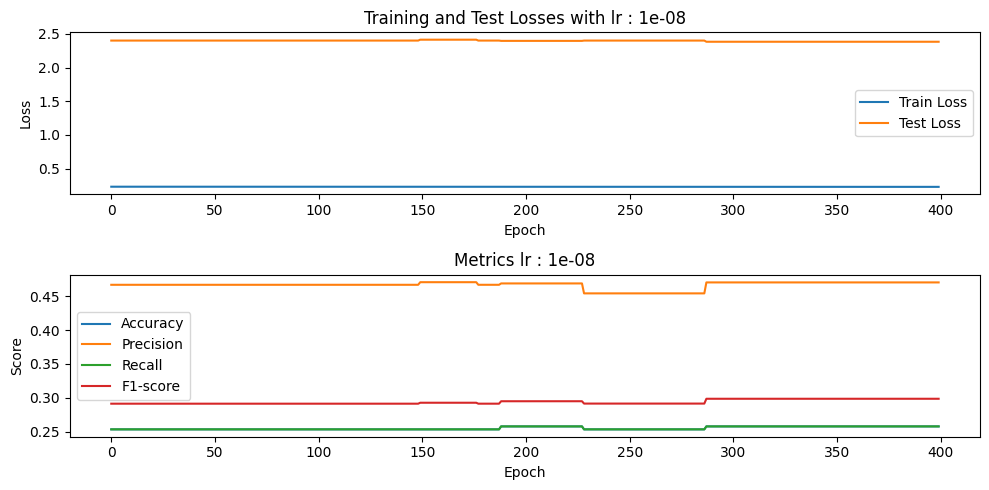

Epoch 1/400, Acc: 0.056768558951965066, Precision: 0.3581201392570407, Recall: 0.056768558951965066, F1: 0.07672064777327935, Train Loss: 0.3144606837026727, Test Loss: 5.489082969432315
Epoch 2/400, Acc: 0.056768558951965066, Precision: 0.3581201392570407, Recall: 0.056768558951965066, F1: 0.07672064777327935, Train Loss: 0.31441187977496665, Test Loss: 5.489082969432315
Epoch 3/400, Acc: 0.056768558951965066, Precision: 0.3581201392570407, Recall: 0.056768558951965066, F1: 0.07672064777327935, Train Loss: 0.31436307978195566, Test Loss: 5.489082969432315
Epoch 4/400, Acc: 0.056768558951965066, Precision: 0.3581201392570407, Recall: 0.056768558951965066, F1: 0.07672064777327935, Train Loss: 0.3143143069193909, Test Loss: 5.489082969432315
Epoch 5/400, Acc: 0.056768558951965066, Precision: 0.3581201392570407, Recall: 0.056768558951965066, F1: 0.07672064777327935, Train Loss: 0.31426554697719106, Test Loss: 5.489082969432315
Epoch 6/400, Acc: 0.056768558951965066, Precision: 0.358120139

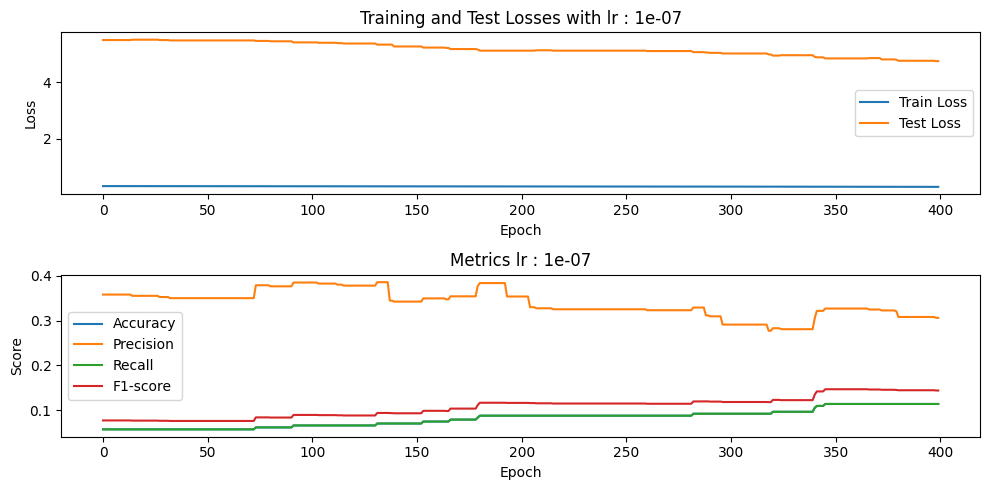

Epoch 1/400, Acc: 0.22270742358078602, Precision: 0.3105318496807675, Recall: 0.22270742358078602, F1: 0.22178601733810957, Train Loss: 0.2355428470427855, Test Loss: 2.109170305676856
Epoch 2/400, Acc: 0.22270742358078602, Precision: 0.3105318496807675, Recall: 0.22270742358078602, F1: 0.22178601733810957, Train Loss: 0.23491213153348134, Test Loss: 2.109170305676856
Epoch 3/400, Acc: 0.2183406113537118, Precision: 0.29914915904493167, Recall: 0.2183406113537118, F1: 0.21695684734420898, Train Loss: 0.2342717622622919, Test Loss: 2.078602620087336
Epoch 4/400, Acc: 0.2183406113537118, Precision: 0.29914915904493167, Recall: 0.2183406113537118, F1: 0.21695684734420898, Train Loss: 0.23363056169864702, Test Loss: 2.078602620087336
Epoch 5/400, Acc: 0.22270742358078602, Precision: 0.3073826937700617, Recall: 0.22270742358078602, F1: 0.22379074052399334, Train Loss: 0.23299451596315462, Test Loss: 2.052401746724891
Epoch 6/400, Acc: 0.22270742358078602, Precision: 0.3031045530765043, Reca

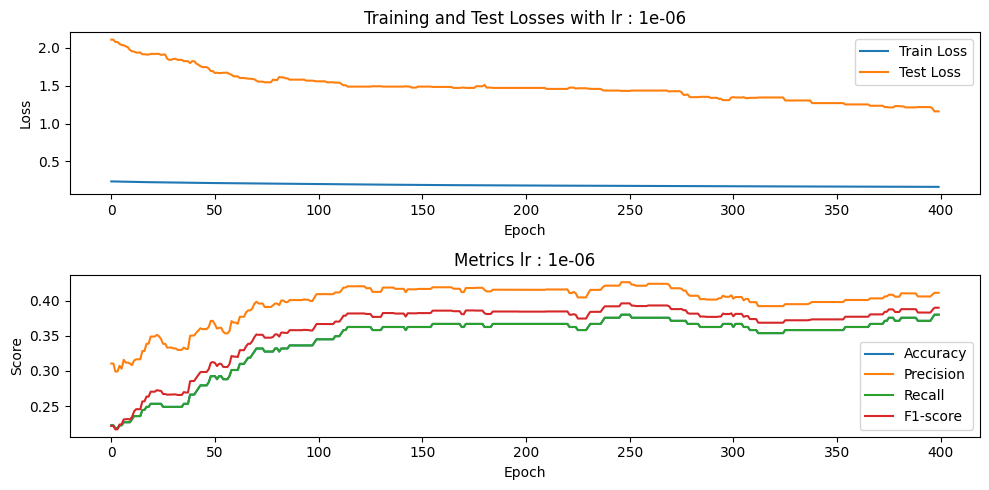

Epoch 1/400, Acc: 0.17467248908296942, Precision: 0.4166852848583325, Recall: 0.17467248908296942, F1: 0.21913683901508205, Train Loss: 0.2574430889030466, Test Loss: 3.3013100436681224
Epoch 2/400, Acc: 0.17467248908296942, Precision: 0.3901069884796683, Recall: 0.17467248908296942, F1: 0.21923943741658788, Train Loss: 0.2526486445159781, Test Loss: 3.1877729257641922
Epoch 3/400, Acc: 0.18340611353711792, Precision: 0.3891505437589699, Recall: 0.18340611353711792, F1: 0.22866956525853135, Train Loss: 0.2485793061081959, Test Loss: 3.131004366812227
Epoch 4/400, Acc: 0.19213973799126638, Precision: 0.39410657573867175, Recall: 0.19213973799126638, F1: 0.23806762981821522, Train Loss: 0.24533673498547573, Test Loss: 3.0436681222707422
Epoch 5/400, Acc: 0.20087336244541484, Precision: 0.4023956629307664, Recall: 0.20087336244541484, F1: 0.24809225000043686, Train Loss: 0.2429561543485285, Test Loss: 2.986899563318777
Epoch 6/400, Acc: 0.2052401746724891, Precision: 0.40332609633095745, 

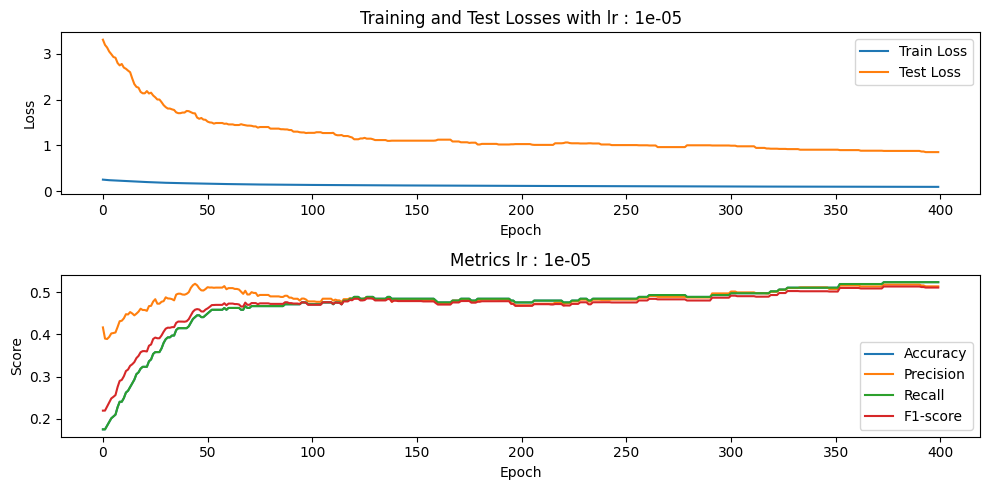

Epoch 1/400, Acc: 0.314410480349345, Precision: 0.3791073555265695, Recall: 0.314410480349345, F1: 0.30425915063208947, Train Loss: 0.25851326805018704, Test Loss: 1.7510917030567685
Epoch 2/400, Acc: 0.388646288209607, Precision: 0.43488636264583247, Recall: 0.388646288209607, F1: 0.39974526171591696, Train Loss: 0.22657391154067402, Test Loss: 1.3711790393013101
Epoch 3/400, Acc: 0.462882096069869, Precision: 0.48774023305233166, Recall: 0.462882096069869, F1: 0.470941583461491, Train Loss: 0.20042802243884358, Test Loss: 1.034934497816594
Epoch 4/400, Acc: 0.4847161572052402, Precision: 0.5067823117963034, Recall: 0.4847161572052402, F1: 0.4855090783727878, Train Loss: 0.17899190468692347, Test Loss: 0.9519650655021834
Epoch 5/400, Acc: 0.4890829694323144, Precision: 0.5028852152214597, Recall: 0.4890829694323144, F1: 0.48920873151744537, Train Loss: 0.1681453142798295, Test Loss: 0.925764192139738
Epoch 6/400, Acc: 0.5021834061135371, Precision: 0.5130736469948226, Recall: 0.502183

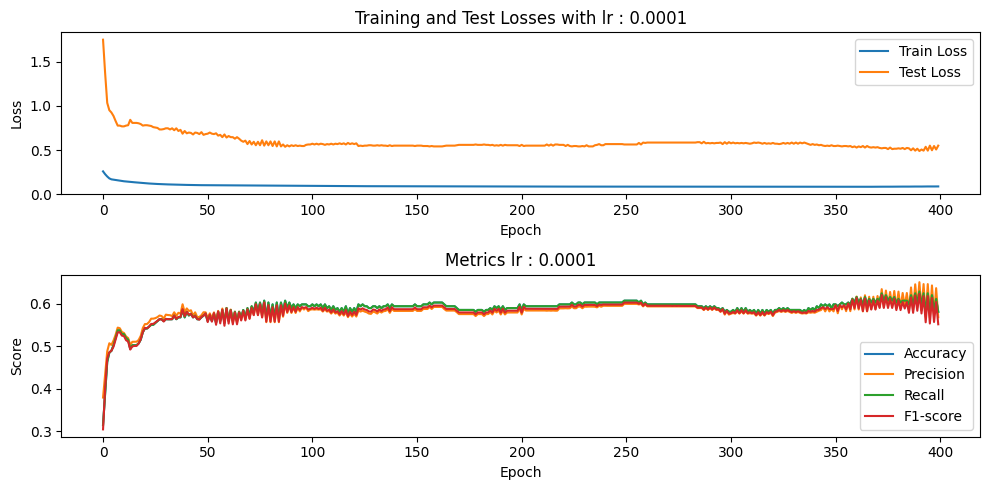

Epoch 1/400, Acc: 0.4192139737991266, Precision: 0.17574035582845482, Recall: 0.4192139737991266, F1: 0.2476587168290225, Train Loss: 0.20114811523322093, Test Loss: 0.9912663755458515
Epoch 2/400, Acc: 0.43231441048034935, Precision: 0.186895749508972, Recall: 0.43231441048034935, F1: 0.2609702843753328, Train Loss: 0.19219547775346463, Test Loss: 0.6724890829694323
Epoch 3/400, Acc: 0.4192139737991266, Precision: 0.17574035582845482, Recall: 0.4192139737991266, F1: 0.2476587168290225, Train Loss: 0.20094821298322393, Test Loss: 0.9912663755458515
Epoch 4/400, Acc: 0.43231441048034935, Precision: 0.186895749508972, Recall: 0.43231441048034935, F1: 0.2609702843753328, Train Loss: 0.19219547775346463, Test Loss: 0.6724890829694323
Epoch 5/400, Acc: 0.4192139737991266, Precision: 0.17574035582845482, Recall: 0.4192139737991266, F1: 0.2476587168290225, Train Loss: 0.20094821298322393, Test Loss: 0.9912663755458515
Epoch 6/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: 0.

<ipython-input-23-280f331debb6>:146: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
<ipython-input-23-280f331debb6>:146: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))


Epoch 29/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 30/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 31/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 32/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 33/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 34/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 35/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 36/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 37/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 38/400, Acc: 0.0, Precision: 0.

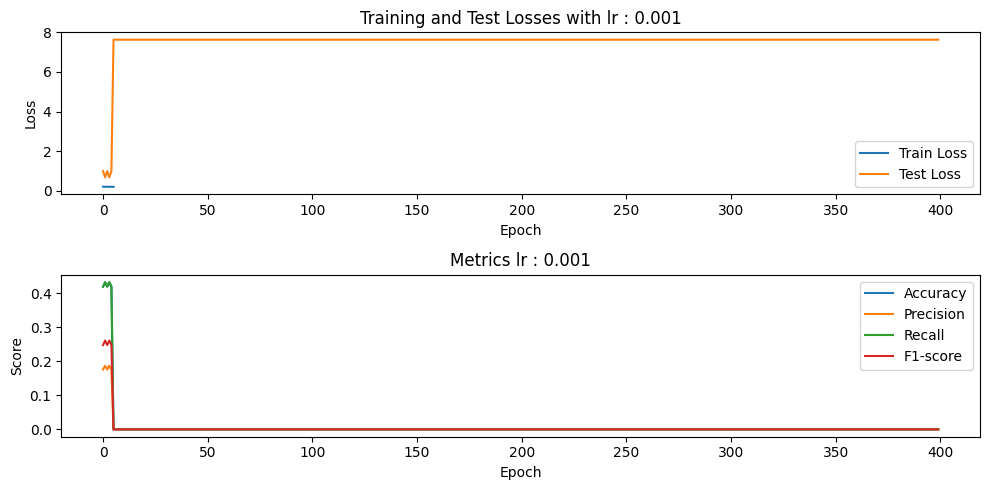

Epoch 1/400, Acc: 0.4192139737991266, Precision: 0.17574035582845482, Recall: 0.4192139737991266, F1: 0.2476587168290225, Train Loss: 0.20884669302832, Test Loss: 0.9912663755458515
Epoch 2/400, Acc: 0.43231441048034935, Precision: 0.186895749508972, Recall: 0.43231441048034935, F1: 0.2609702843753328, Train Loss: 0.19219547775346463, Test Loss: 0.6724890829694323
Epoch 3/400, Acc: 0.4192139737991266, Precision: 0.17574035582845482, Recall: 0.4192139737991266, F1: 0.2476587168290225, Train Loss: 0.20094821298322393, Test Loss: 0.9912663755458515
Epoch 4/400, Acc: 0.43231441048034935, Precision: 0.186895749508972, Recall: 0.43231441048034935, F1: 0.2609702843753328, Train Loss: 0.19219547775346463, Test Loss: 0.6724890829694323
Epoch 5/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: 0.20094821298322393, Test Loss: 7.62882096069869
Epoch 6/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 7/400, Acc: 0.0, Precision: 0

<ipython-input-23-280f331debb6>:146: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
<ipython-input-23-280f331debb6>:146: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))


Epoch 20/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 21/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 22/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 23/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 24/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 25/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 26/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 27/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 28/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 29/400, Acc: 0.0, Precision: 0.

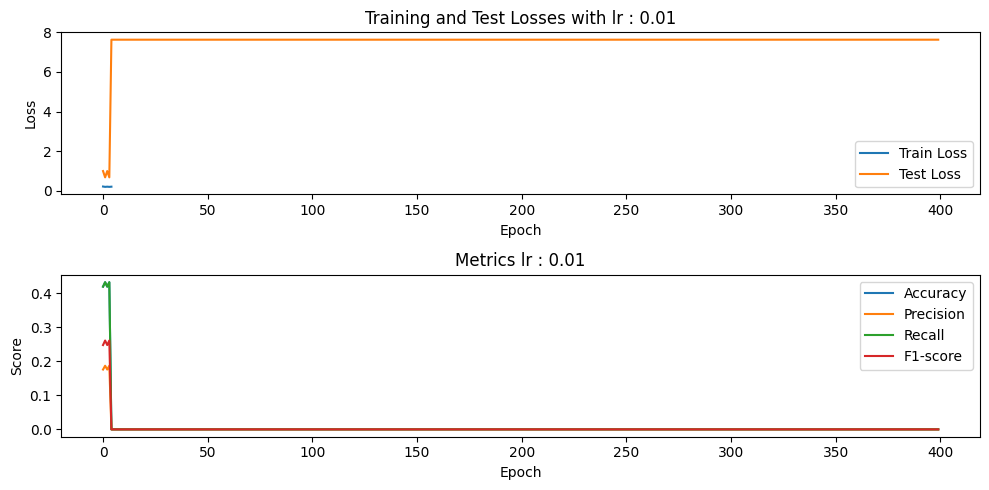

Epoch 1/400, Acc: 0.4192139737991266, Precision: 0.17574035582845482, Recall: 0.4192139737991266, F1: 0.2476587168290225, Train Loss: 0.31788834202611244, Test Loss: 0.9912663755458515
Epoch 2/400, Acc: 0.43231441048034935, Precision: 0.186895749508972, Recall: 0.43231441048034935, F1: 0.2609702843753328, Train Loss: 0.19219547775346463, Test Loss: 0.6724890829694323
Epoch 3/400, Acc: 0.4192139737991266, Precision: 0.17574035582845482, Recall: 0.4192139737991266, F1: 0.2476587168290225, Train Loss: 0.20094821298322393, Test Loss: 0.9912663755458515
Epoch 4/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: 0.19219547775346463, Test Loss: 7.62882096069869
Epoch 5/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 6/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 7/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch

<ipython-input-23-280f331debb6>:146: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
<ipython-input-23-280f331debb6>:146: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))


Epoch 26/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 27/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 28/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 29/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 30/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 31/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 32/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 33/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 34/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 35/400, Acc: 0.0, Precision: 0.

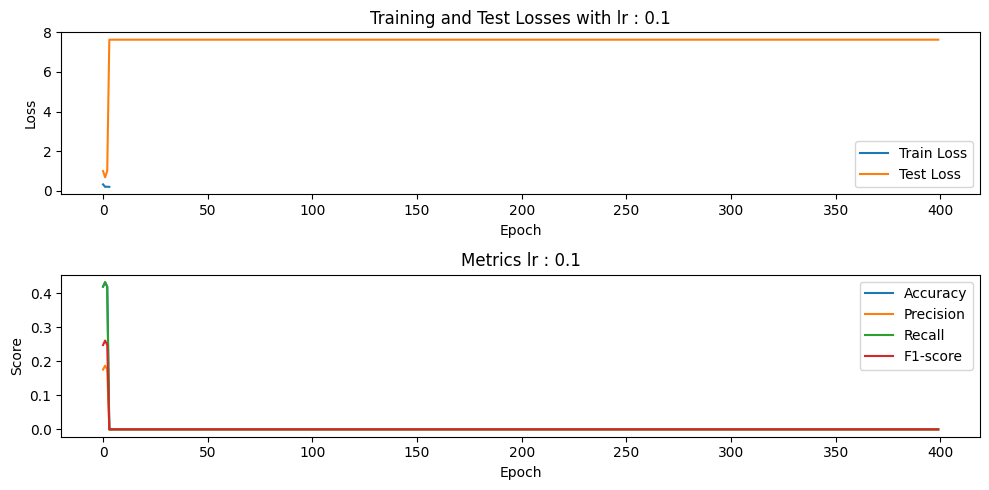

In [25]:
result_list = [0.00000001 ,0.0000001 ,0.000001 ,0.00001 ,0.0001 ,0.001 ,0.01 ,0.1]
# Define dimensions
input_size = 11
hidden_size1 = 18
hidden_size2 = 10
output_size = 6

# Train the MLP
y_train_n = pd.get_dummies(y_train)

for lr in result_list:
  mlp = MLP(input_size, hidden_size1 ,hidden_size2, output_size, learning_rate=lr)

  mlp.train(X_train, y_train_n, epochs=400 ,X_test = X_test ,y_test = y_test)

# sigmoid

Epoch 1/400, Acc: 0.3537117903930131, Precision: 0.18626312366440584, Recall: 0.3537117903930131, F1: 0.24402416201329824, Train Loss: 0.15158652889589744, Test Loss: 1.834061135371179
Epoch 2/400, Acc: 0.38427947598253276, Precision: 0.19117421166970225, Recall: 0.38427947598253276, F1: 0.2553266316930922, Train Loss: 0.1476057930475799, Test Loss: 1.6200873362445414
Epoch 3/400, Acc: 0.38427947598253276, Precision: 0.18927198070781465, Recall: 0.38427947598253276, F1: 0.2536244541484716, Train Loss: 0.14367194105060813, Test Loss: 1.5982532751091703
Epoch 4/400, Acc: 0.38427947598253276, Precision: 0.1855788688891256, Recall: 0.38427947598253276, F1: 0.250287290278097, Train Loss: 0.1397994228207527, Test Loss: 1.3493449781659388
Epoch 5/400, Acc: 0.3930131004366812, Precision: 0.4148111317681986, Recall: 0.3930131004366812, F1: 0.2840894253507232, Train Loss: 0.13605244206990677, Test Loss: 1.165938864628821
Epoch 6/400, Acc: 0.4192139737991266, Precision: 0.42788583287524007, Recal

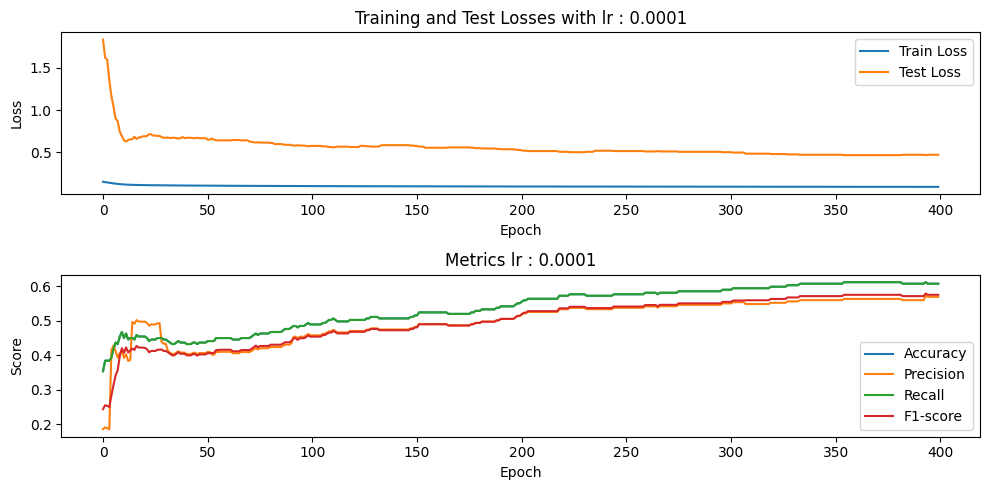

In [31]:
mlp = MLP(input_size, hidden_size1 ,hidden_size2, output_size, learning_rate=0.0001)
mlp.train(X_train, y_train_n, epochs=400 ,X_test = X_test ,y_test = y_test)

# TanH

Epoch 1/400, Acc: 0.2052401746724891, Precision: 0.3115628784264798, Recall: 0.2052401746724891, F1: 0.2373528357733505, Train Loss: 0.20891883859161992, Test Loss: 2.6331877729257642
Epoch 2/400, Acc: 0.21397379912663755, Precision: 0.31750547053746453, Recall: 0.21397379912663755, F1: 0.24548297951239764, Train Loss: 0.202463875951412, Test Loss: 2.685589519650655
Epoch 3/400, Acc: 0.22270742358078602, Precision: 0.3336581017894589, Recall: 0.22270742358078602, F1: 0.2556413907385481, Train Loss: 0.1954883831264973, Test Loss: 2.7074235807860263
Epoch 4/400, Acc: 0.25327510917030566, Precision: 0.3754232997951363, Recall: 0.25327510917030566, F1: 0.29037650658425246, Train Loss: 0.18850824283416387, Test Loss: 2.6375545851528384
Epoch 5/400, Acc: 0.2576419213973799, Precision: 0.3761743992566871, Recall: 0.2576419213973799, F1: 0.29453045587403887, Train Loss: 0.18197775190434212, Test Loss: 2.606986899563319
Epoch 6/400, Acc: 0.2838427947598253, Precision: 0.4048330638174363, Recall

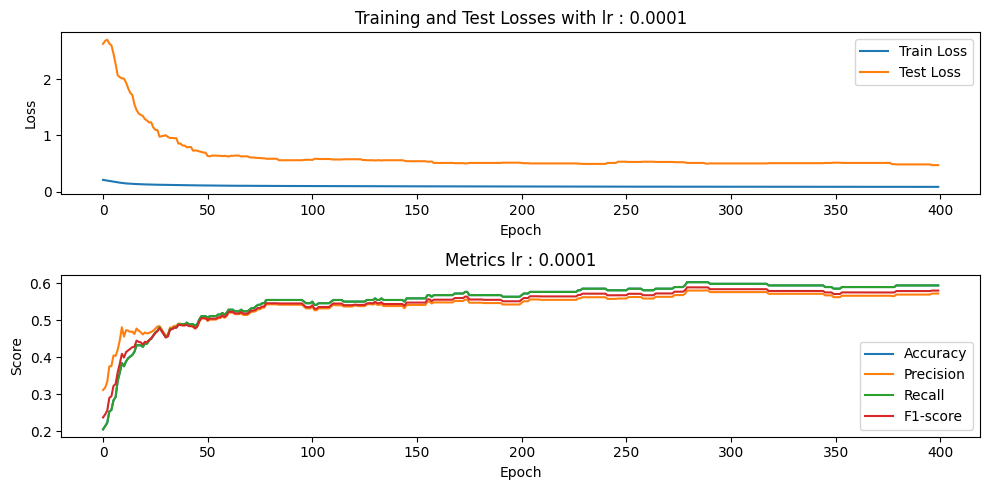

In [33]:
mlp = MLP(input_size, hidden_size1 ,hidden_size2, output_size, learning_rate=0.0001)
mlp.train(X_train, y_train_n, epochs=400 ,X_test = X_test ,y_test = y_test)

# leaky_relu

Epoch 1/400, Acc: 0.34497816593886466, Precision: 0.39086168562151097, Recall: 0.34497816593886466, F1: 0.364725231100777, Train Loss: 0.23030653380635227, Test Loss: 1.6506550218340612
Epoch 2/400, Acc: 0.38427947598253276, Precision: 0.4317218957822783, Recall: 0.38427947598253276, F1: 0.3998737058372632, Train Loss: 0.1945389063429272, Test Loss: 1.5283842794759825
Epoch 3/400, Acc: 0.4017467248908297, Precision: 0.4312411785898997, Recall: 0.4017467248908297, F1: 0.4123350451934491, Train Loss: 0.17950280743813768, Test Loss: 1.275109170305677
Epoch 4/400, Acc: 0.40611353711790393, Precision: 0.43380175329152576, Recall: 0.40611353711790393, F1: 0.4184024500309738, Train Loss: 0.17030905694840087, Test Loss: 1.279475982532751
Epoch 5/400, Acc: 0.43231441048034935, Precision: 0.4654396179677724, Recall: 0.43231441048034935, F1: 0.4474906020679546, Train Loss: 0.1660853953492659, Test Loss: 1.2008733624454149
Epoch 6/400, Acc: 0.42358078602620086, Precision: 0.45573071826699696, Reca

<ipython-input-36-4d430ba548fb>:191: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
<ipython-input-36-4d430ba548fb>:191: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))


Epoch 153/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 154/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 155/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 156/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 157/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 158/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 159/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 160/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 161/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 162/400, Acc: 0.0, Pre

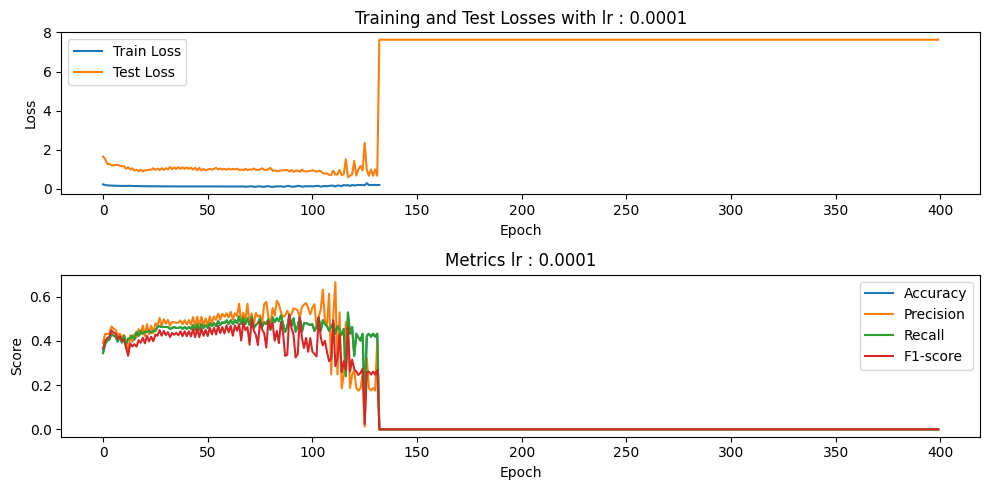

In [37]:
mlp = MLP(input_size, hidden_size1 ,hidden_size2, output_size, learning_rate=0.0001)
mlp.train(X_train, y_train_n, epochs=400 ,X_test = X_test ,y_test = y_test)

# elu

Epoch 1/400, Acc: 0.3056768558951965, Precision: 0.44235248447204967, Recall: 0.3056768558951965, F1: 0.3124001926122705, Train Loss: 0.22908375754447352, Test Loss: 2.1790393013100435
Epoch 2/400, Acc: 0.31877729257641924, Precision: 0.401649921522826, Recall: 0.31877729257641924, F1: 0.3260555132424749, Train Loss: 0.21909983189603185, Test Loss: 1.9475982532751093
Epoch 3/400, Acc: 0.38427947598253276, Precision: 0.42366457408772, Recall: 0.38427947598253276, F1: 0.4016794733730323, Train Loss: 0.21671968032406724, Test Loss: 1.5589519650655022
Epoch 4/400, Acc: 0.4017467248908297, Precision: 0.43387509267597135, Recall: 0.4017467248908297, F1: 0.40226683696496607, Train Loss: 0.19843512110193623, Test Loss: 1.51528384279476
Epoch 5/400, Acc: 0.388646288209607, Precision: 0.4169410532357057, Recall: 0.388646288209607, F1: 0.3934868669453599, Train Loss: 0.18390363314391794, Test Loss: 1.388646288209607
Epoch 6/400, Acc: 0.44541484716157204, Precision: 0.47044744933672517, Recall: 0.

<ipython-input-38-49e92073ec31>:155: RuntimeWarning: overflow encountered in exp
  return np.where(x > 0, x, alpha * (np.exp(x) - 1))
<ipython-input-38-49e92073ec31>:158: RuntimeWarning: overflow encountered in exp
  return np.where(x > 0, 1, alpha * np.exp(x))
<ipython-input-38-49e92073ec31>:155: RuntimeWarning: overflow encountered in exp
  return np.where(x > 0, x, alpha * (np.exp(x) - 1))
<ipython-input-38-49e92073ec31>:158: RuntimeWarning: overflow encountered in exp
  return np.where(x > 0, 1, alpha * np.exp(x))
<ipython-input-38-49e92073ec31>:155: RuntimeWarning: overflow encountered in exp
  return np.where(x > 0, x, alpha * (np.exp(x) - 1))
<ipython-input-38-49e92073ec31>:158: RuntimeWarning: overflow encountered in exp
  return np.where(x > 0, 1, alpha * np.exp(x))
<ipython-input-38-49e92073ec31>:155: RuntimeWarning: overflow encountered in exp
  return np.where(x > 0, x, alpha * (np.exp(x) - 1))
<ipython-input-38-49e92073ec31>:158: RuntimeWarning: overflow encountered in exp

Epoch 37/400, Acc: 0.5021834061135371, Precision: 0.4222555574472784, Recall: 0.5021834061135371, F1: 0.4421095136541465, Train Loss: 0.20787746170678317, Test Loss: 0.6375545851528385
Epoch 38/400, Acc: 0.34497816593886466, Precision: 0.2032460421539335, Recall: 0.34497816593886466, F1: 0.2529815419617629, Train Loss: 0.17541940189642596, Test Loss: 1.0829694323144106
Epoch 39/400, Acc: 0.4192139737991266, Precision: 0.17574035582845482, Recall: 0.4192139737991266, F1: 0.2476587168290225, Train Loss: 0.21735959153902262, Test Loss: 0.9912663755458515
Epoch 40/400, Acc: 0.43231441048034935, Precision: 0.186895749508972, Recall: 0.43231441048034935, F1: 0.2609702843753328, Train Loss: 0.19219547775346463, Test Loss: 0.6724890829694323
Epoch 41/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: 0.20058351568198396, Test Loss: 7.62882096069869
Epoch 42/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 43/400, Acc: 0.0, Pr

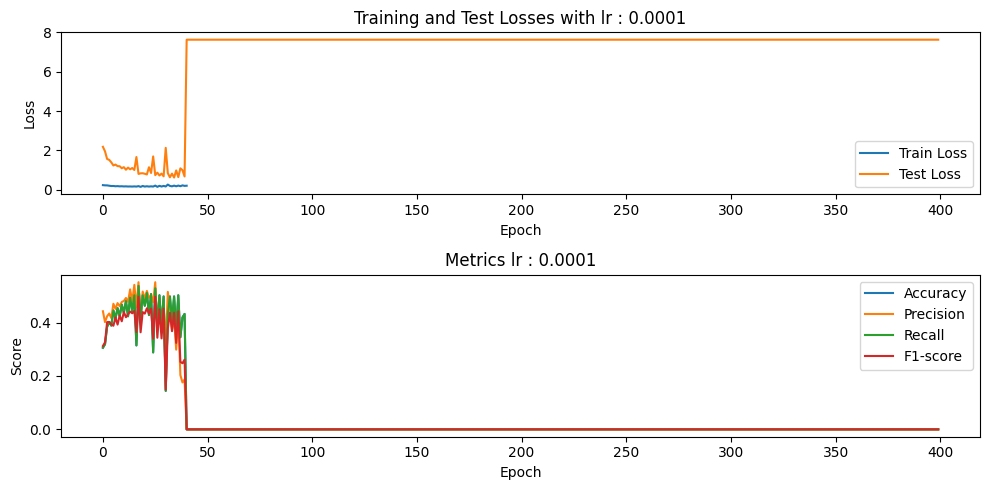

In [39]:
mlp = MLP(input_size, hidden_size1 ,hidden_size2, output_size, learning_rate=0.0001)
mlp.train(X_train, y_train_n, epochs=400 ,X_test = X_test ,y_test = y_test)

#selu

Epoch 1/400, Acc: 0.22707423580786026, Precision: 0.38799746518599376, Recall: 0.22707423580786026, F1: 0.2617619259139437, Train Loss: 0.2851487678603712, Test Loss: 2.650655021834061
Epoch 2/400, Acc: 0.27510917030567683, Precision: 0.42331696703105576, Recall: 0.27510917030567683, F1: 0.3185440049706372, Train Loss: 0.2547439327664497, Test Loss: 2.554585152838428
Epoch 3/400, Acc: 0.32751091703056767, Precision: 0.46060684755067766, Recall: 0.32751091703056767, F1: 0.3699299526141027, Train Loss: 0.235695621373876, Test Loss: 2.1572052401746724
Epoch 4/400, Acc: 0.37554585152838427, Precision: 0.4854291062013873, Recall: 0.37554585152838427, F1: 0.4209130826303262, Train Loss: 0.2179614830455526, Test Loss: 2.0
Epoch 5/400, Acc: 0.3930131004366812, Precision: 0.4839722329703536, Recall: 0.3930131004366812, F1: 0.4326439063120286, Train Loss: 0.1936366159608229, Test Loss: 1.8820960698689957
Epoch 6/400, Acc: 0.4148471615720524, Precision: 0.4929410029740204, Recall: 0.4148471615720

<ipython-input-40-2e127fe88f74>:161: RuntimeWarning: overflow encountered in exp
  return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))
<ipython-input-40-2e127fe88f74>:161: RuntimeWarning: overflow encountered in exp
  return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))
<ipython-input-40-2e127fe88f74>:164: RuntimeWarning: overflow encountered in exp
  return scale * np.where(x > 0, 1, alpha * np.exp(x))
<ipython-input-40-2e127fe88f74>:161: RuntimeWarning: overflow encountered in exp
  return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))
<ipython-input-40-2e127fe88f74>:164: RuntimeWarning: overflow encountered in exp
  return scale * np.where(x > 0, 1, alpha * np.exp(x))
<ipython-input-40-2e127fe88f74>:164: RuntimeWarning: overflow encountered in multiply
  return scale * np.where(x > 0, 1, alpha * np.exp(x))
<ipython-input-40-2e127fe88f74>:161: RuntimeWarning: overflow encountered in exp
  return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))
<ipython-input-40-2

Epoch 85/400, Acc: 0.4148471615720524, Precision: 0.29658916558479875, Recall: 0.4148471615720524, F1: 0.26160364339362824, Train Loss: 0.16629460808355034, Test Loss: 0.7030567685589519
Epoch 86/400, Acc: 0.4279475982532751, Precision: 0.29268659108208805, Recall: 0.4279475982532751, F1: 0.27249594551141665, Train Loss: 0.2064186725018235, Test Loss: 0.8951965065502183
Epoch 87/400, Acc: 0.43231441048034935, Precision: 0.186895749508972, Recall: 0.43231441048034935, F1: 0.2609702843753328, Train Loss: 0.18599562363238512, Test Loss: 0.6724890829694323
Epoch 88/400, Acc: 0.4192139737991266, Precision: 0.17574035582845482, Recall: 0.4192139737991266, F1: 0.2476587168290225, Train Loss: 0.20094821298322393, Test Loss: 0.9912663755458515
Epoch 89/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: 0.19219547775346463, Test Loss: 7.62882096069869
Epoch 90/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 91/400, Acc: 0.0, P

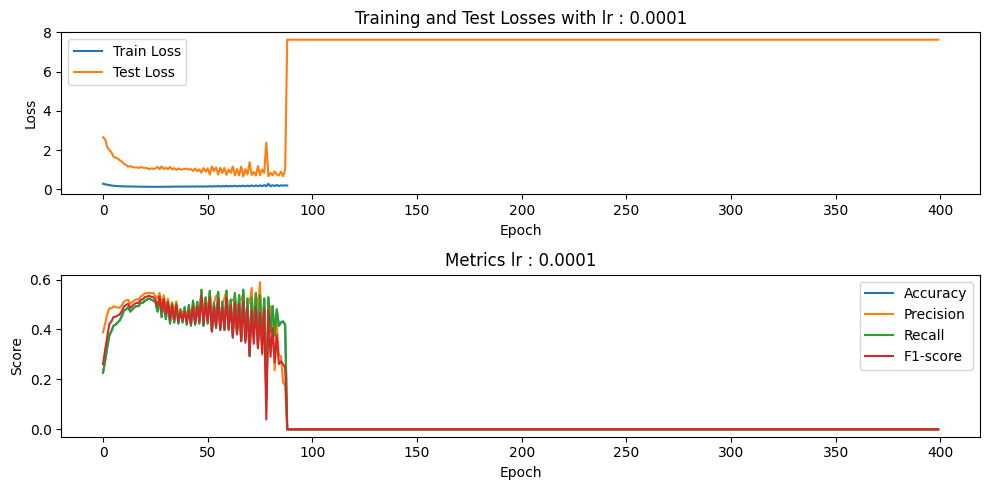

In [41]:
mlp = MLP(input_size, hidden_size1 ,hidden_size2, output_size, learning_rate=0.0001)
mlp.train(X_train, y_train_n, epochs=400 ,X_test = X_test ,y_test = y_test)

# swish

Epoch 1/400, Acc: 0.2096069868995633, Precision: 0.38036635116329437, Recall: 0.2096069868995633, F1: 0.2176206816178661, Train Loss: 0.28947473590673134, Test Loss: 1.925764192139738
Epoch 2/400, Acc: 0.22270742358078602, Precision: 0.3383374579257299, Recall: 0.22270742358078602, F1: 0.25921251225397945, Train Loss: 0.2311492217607398, Test Loss: 1.7903930131004366
Epoch 3/400, Acc: 0.34934497816593885, Precision: 0.42042673483721527, Recall: 0.34934497816593885, F1: 0.37733833005609607, Train Loss: 0.2201616352884771, Test Loss: 1.2882096069868996
Epoch 4/400, Acc: 0.3318777292576419, Precision: 0.40712474033149937, Recall: 0.3318777292576419, F1: 0.36121521017120817, Train Loss: 0.18895348778592064, Test Loss: 1.3406113537117903
Epoch 5/400, Acc: 0.36681222707423583, Precision: 0.42195707610213445, Recall: 0.36681222707423583, F1: 0.389301218954552, Train Loss: 0.1807272483322066, Test Loss: 1.25764192139738
Epoch 6/400, Acc: 0.37554585152838427, Precision: 0.4286580249633017, Reca

<ipython-input-42-e21fa86e203a>:134: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-42-e21fa86e203a>:134: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-42-e21fa86e203a>:134: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-42-e21fa86e203a>:134: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-42-e21fa86e203a>:134: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-42-e21fa86e203a>:191: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
<ipython-input-42-e21fa86e203a>:134: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-42-e21fa86e203a>:191: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
<ipython-input-42-e21fa86e203a>:

Epoch 51/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 52/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 53/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 54/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 55/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 56/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 57/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 58/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 59/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 60/400, Acc: 0.0, Precision: 0.

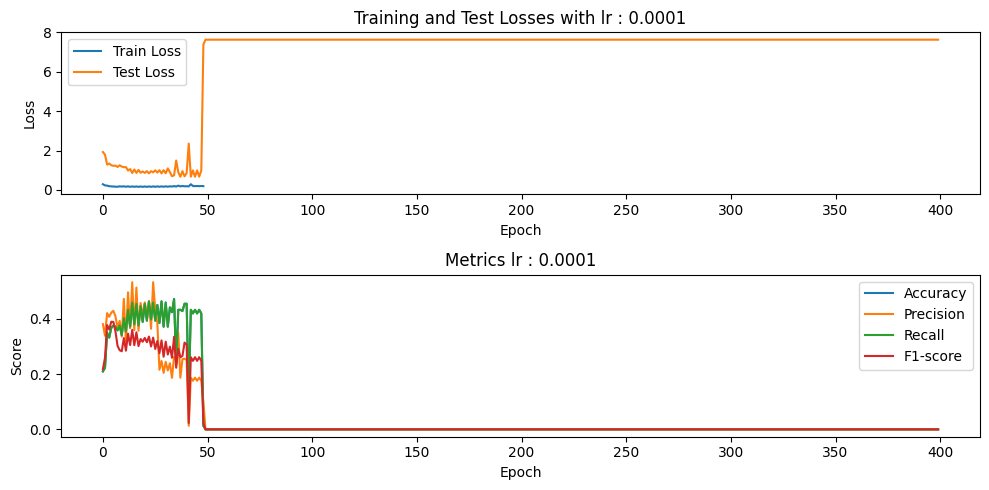

In [43]:
mlp = MLP(input_size, hidden_size1 ,hidden_size2, output_size, learning_rate=0.0001)
mlp.train(X_train, y_train_n, epochs=400 ,X_test = X_test ,y_test = y_test)

# softplus

Epoch 1/400, Acc: 0.20087336244541484, Precision: 0.14158396188963873, Recall: 0.20087336244541484, F1: 0.16508615377441135, Train Loss: 0.3159827698713866, Test Loss: 1.960698689956332
Epoch 2/400, Acc: 0.24017467248908297, Precision: 0.37592105382118673, Recall: 0.24017467248908297, F1: 0.25708395218814345, Train Loss: 0.24431219082508163, Test Loss: 2.1179039301310043
Epoch 3/400, Acc: 0.43231441048034935, Precision: 0.5021834061135371, Recall: 0.43231441048034935, F1: 0.4587379056426063, Train Loss: 0.21806088128326545, Test Loss: 1.314410480349345
Epoch 4/400, Acc: 0.39737991266375544, Precision: 0.5763221737020864, Recall: 0.39737991266375544, F1: 0.3124029947648706, Train Loss: 0.17599191933054698, Test Loss: 1.222707423580786
Epoch 5/400, Acc: 0.3930131004366812, Precision: 0.22672096560522056, Recall: 0.3930131004366812, F1: 0.2865272920133955, Train Loss: 0.18222338139952288, Test Loss: 1.1528384279475983
Epoch 6/400, Acc: 0.43231441048034935, Precision: 0.2486475917356449, R

<ipython-input-52-81bf5639afcf>:173: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
<ipython-input-52-81bf5639afcf>:191: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))


Epoch 26/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 27/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 28/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 29/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 30/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 31/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 32/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 33/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 34/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 35/400, Acc: 0.0, Precision: 0.

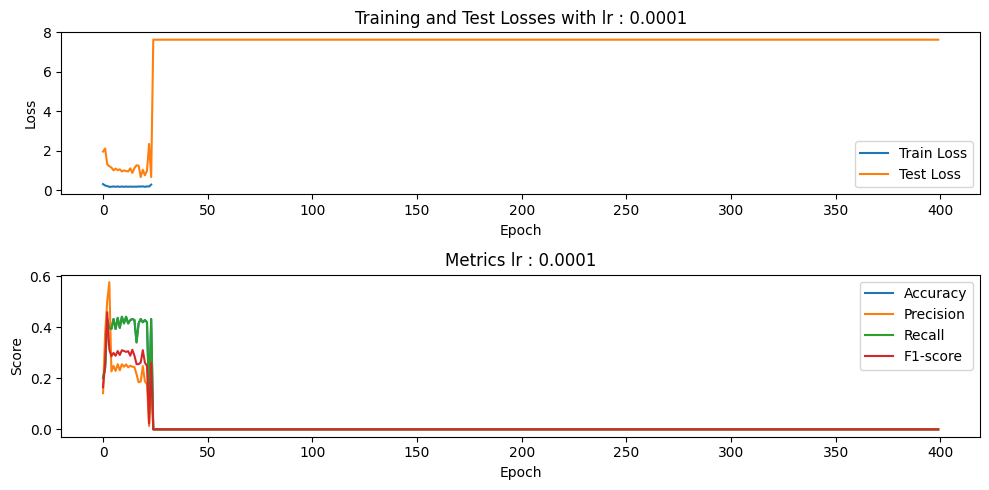

In [53]:
mlp = MLP(input_size, hidden_size1 ,hidden_size2, output_size, learning_rate=0.0001)
mlp.train(X_train, y_train_n, epochs=400 ,X_test = X_test ,y_test = y_test)

# gelu


Epoch 1/400, Acc: 0.2794759825327511, Precision: 0.3180629062443402, Recall: 0.2794759825327511, F1: 0.23115635390086806, Train Loss: 0.2590909527417835, Test Loss: 1.4323144104803494
Epoch 2/400, Acc: 0.34934497816593885, Precision: 0.37242669993761696, Recall: 0.34934497816593885, F1: 0.35731441048034934, Train Loss: 0.20844252906850858, Test Loss: 1.0786026200873362
Epoch 3/400, Acc: 0.314410480349345, Precision: 0.35853897972309673, Recall: 0.314410480349345, F1: 0.3071621685635136, Train Loss: 0.18805695948007511, Test Loss: 1.4017467248908297
Epoch 4/400, Acc: 0.4410480349344978, Precision: 0.4589519650655022, Recall: 0.4410480349344978, F1: 0.4380452153377917, Train Loss: 0.18101267813772018, Test Loss: 0.9781659388646288
Epoch 5/400, Acc: 0.35807860262008734, Precision: 0.41820725923839036, Recall: 0.35807860262008734, F1: 0.3295082555115126, Train Loss: 0.16889915621253826, Test Loss: 1.3362445414847162
Epoch 6/400, Acc: 0.45414847161572053, Precision: 0.4703829129905237, Reca

<ipython-input-56-cc6bc9a13da6>:179: RuntimeWarning: overflow encountered in power
  return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))
<ipython-input-56-cc6bc9a13da6>:179: RuntimeWarning: overflow encountered in power
  return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))
<ipython-input-56-cc6bc9a13da6>:182: RuntimeWarning: overflow encountered in power
  cdf = 0.5 * (1 + np.tanh((np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3)))))
<ipython-input-56-cc6bc9a13da6>:183: RuntimeWarning: overflow encountered in power
  return 0.5 * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3)))) + 0.5 * x * (1 - np.power(cdf, 2)) * (np.sqrt(2 / np.pi) * (1 + 0.134145 * np.power(x, 2)))
<ipython-input-56-cc6bc9a13da6>:193: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
<ipython-input-56-cc6bc9a13da6>:179: RuntimeWarning: overflow encountered in power
 

Epoch 48/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 49/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 50/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 51/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 52/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 53/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 54/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 55/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 56/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 57/400, Acc: 0.0, Precision: 0.

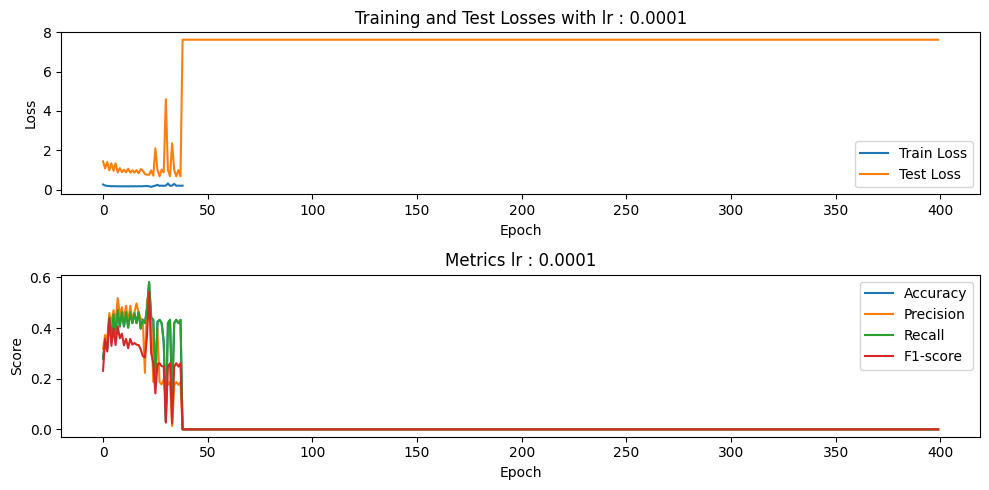

In [57]:
mlp = MLP(input_size, hidden_size1 ,hidden_size2, output_size, learning_rate=0.0001)
mlp.train(X_train, y_train_n, epochs=400 ,X_test = X_test ,y_test = y_test)

# mish

Epoch 1/400, Acc: 0.2794759825327511, Precision: 0.16162466459725366, Recall: 0.2794759825327511, F1: 0.2048068268942298, Train Loss: 0.3107996363651055, Test Loss: 2.1877729257641922
Epoch 2/400, Acc: 0.2663755458515284, Precision: 0.3220835932626326, Recall: 0.2663755458515284, F1: 0.2372069169467291, Train Loss: 0.21377411800597898, Test Loss: 2.388646288209607
Epoch 3/400, Acc: 0.30131004366812225, Precision: 0.3660981055258233, Recall: 0.30131004366812225, F1: 0.28630921346684146, Train Loss: 0.20346693140180017, Test Loss: 2.2794759825327513
Epoch 4/400, Acc: 0.37554585152838427, Precision: 0.42916624352594696, Recall: 0.37554585152838427, F1: 0.37244274965660046, Train Loss: 0.18575075860280216, Test Loss: 1.8558951965065502
Epoch 5/400, Acc: 0.4148471615720524, Precision: 0.417949011243364, Recall: 0.4148471615720524, F1: 0.39960550317255744, Train Loss: 0.17078239844428114, Test Loss: 1.4672489082969433
Epoch 6/400, Acc: 0.4366812227074236, Precision: 0.4479556098197624, Recal

<ipython-input-58-64d9463b5f93>:186: RuntimeWarning: overflow encountered in exp
  return x * np.tanh(np.log(1 + np.exp(x)))
<ipython-input-58-64d9463b5f93>:186: RuntimeWarning: overflow encountered in exp
  return x * np.tanh(np.log(1 + np.exp(x)))
<ipython-input-58-64d9463b5f93>:186: RuntimeWarning: overflow encountered in exp
  return x * np.tanh(np.log(1 + np.exp(x)))
<ipython-input-58-64d9463b5f93>:189: RuntimeWarning: overflow encountered in exp
  return np.tanh(np.log(1 + np.exp(x))) + x * (1 - np.power(np.tanh(np.log(1 + np.exp(x))), 2)) * (1 / (1 + np.exp(-x)))
<ipython-input-58-64d9463b5f93>:186: RuntimeWarning: overflow encountered in exp
  return x * np.tanh(np.log(1 + np.exp(x)))
<ipython-input-58-64d9463b5f93>:189: RuntimeWarning: overflow encountered in exp
  return np.tanh(np.log(1 + np.exp(x))) + x * (1 - np.power(np.tanh(np.log(1 + np.exp(x))), 2)) * (1 / (1 + np.exp(-x)))
<ipython-input-58-64d9463b5f93>:186: RuntimeWarning: overflow encountered in exp
  return x * np

Epoch 305/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: 0.20094821298322393, Test Loss: 7.62882096069869
Epoch 306/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 307/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 308/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 309/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 310/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 311/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 312/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 313/400, Acc: 0.0, Precision: 0.0, Recall: 0.0, F1: 0.0, Train Loss: nan, Test Loss: 7.62882096069869
Epoch 314/40

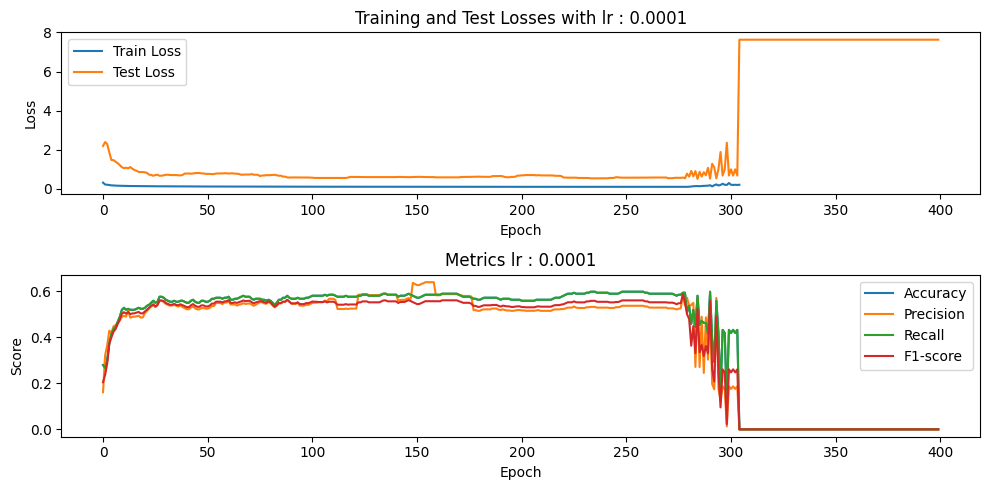

In [59]:
mlp = MLP(input_size, hidden_size1 ,hidden_size2, output_size, learning_rate=0.0001)
mlp.train(X_train, y_train_n, epochs=400 ,X_test = X_test ,y_test = y_test)

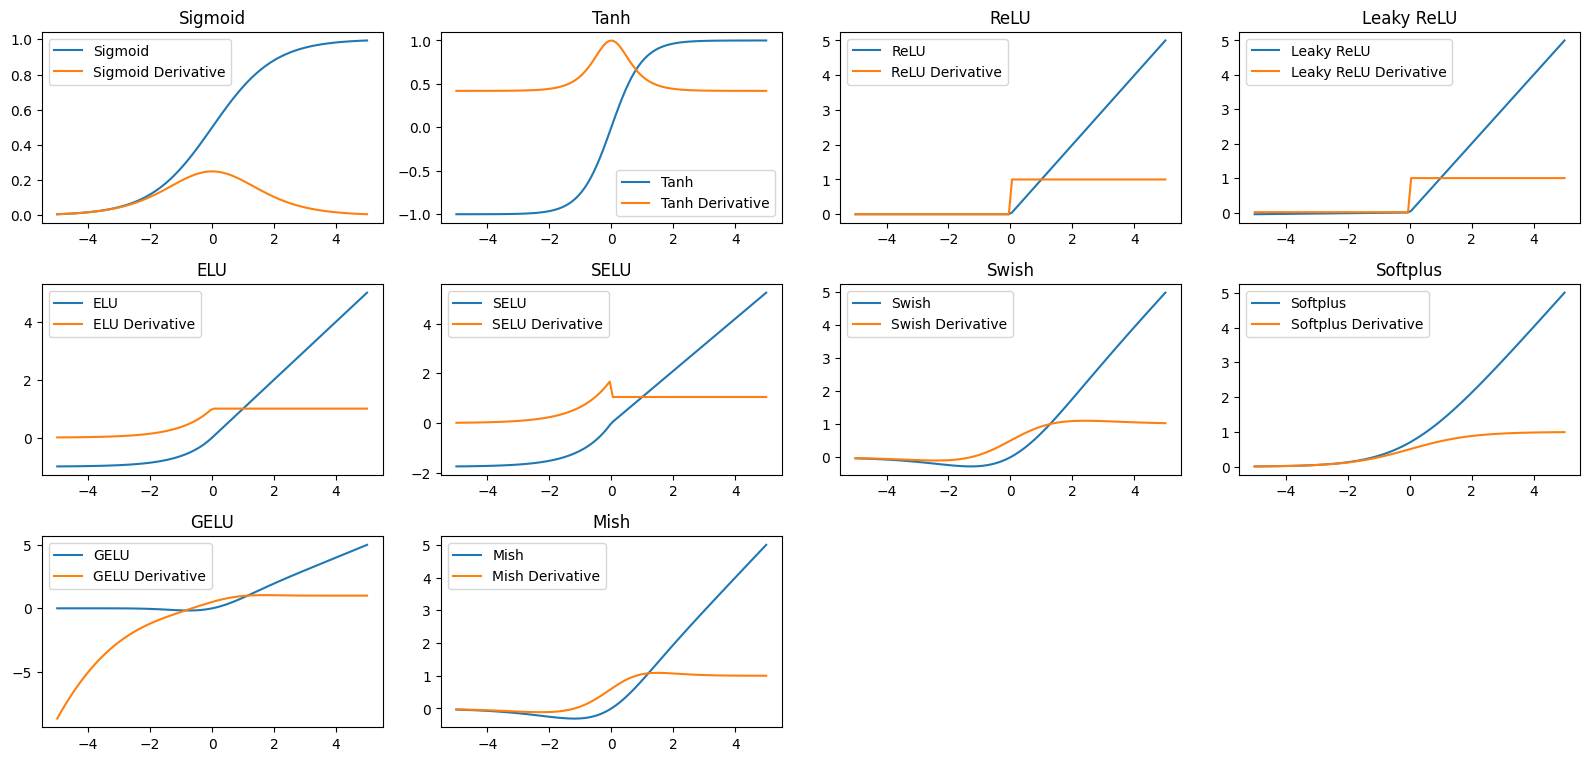

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class ActivationFunctions:
    def tanh(self, x):
        return np.tanh(x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def derivative_sigmoid(self, x):
        return x * (1 - x)

    def derivative_tanh(self, x):
        return 1 - np.tanh(x) ** 2

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def leaky_relu(self, x, alpha=0.01):
        return np.where(x > 0, x, alpha * x)

    def leaky_relu_derivative(self, x, alpha=0.01):
        return np.where(x > 0, 1, alpha)

    def elu(self, x, alpha=1.0):
        return np.where(x > 0, x, alpha * (np.exp(x) - 1))

    def elu_derivative(self, x, alpha=1.0):
        return np.where(x > 0, 1, alpha * np.exp(x))

    def selu(self, x, alpha=1.67326324, scale=1.05070098):
        return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))

    def selu_derivative(self, x, alpha=1.67326324, scale=1.05070098):
        return scale * np.where(x > 0, 1, alpha * np.exp(x))

    def swish(self, x):
        return x * self.sigmoid(x)

    def swish_derivative(self, x):
        return self.sigmoid(x) + x * self.sigmoid(x) * (1 - self.sigmoid(x))

    def softplus(self, x):
        return np.log(1 + np.exp(x))

    def softplus_derivative(self, x):
        return self.sigmoid(x)

    def gelu(self, x):
        return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))

    def gelu_derivative(self, x):
        cdf = 0.5 * (1 + np.tanh((np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3)))))
        return 0.5 * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3)))) + 0.5 * x * (1 - np.power(cdf, 2)) * (np.sqrt(2 / np.pi) * (1 + 0.134145 * np.power(x, 2)))

    def mish(self, x):
        return x * np.tanh(np.log(1 + np.exp(x)))

    def mish_derivative(self, x):
        return np.tanh(np.log(1 + np.exp(x))) + x * (1 - np.power(np.tanh(np.log(1 + np.exp(x))), 2)) * (1 / (1 + np.exp(-x)))

# Define x range
x = np.linspace(-5, 5, 100)

# Instantiate the ActivationFunctions class
act_funcs = ActivationFunctions()

# Plot activations and their derivatives
plt.figure(figsize=(16, 10))

# Sigmoid
plt.subplot(4, 4, 1)
plt.plot(x, act_funcs.sigmoid(x), label='Sigmoid')
plt.plot(x, act_funcs.derivative_sigmoid(act_funcs.sigmoid(x)), label='Sigmoid Derivative')
plt.title('Sigmoid')
plt.legend()

# Tanh
plt.subplot(4, 4, 2)
plt.plot(x, act_funcs.tanh(x), label='Tanh')
plt.plot(x, act_funcs.derivative_tanh(act_funcs.tanh(x)), label='Tanh Derivative')
plt.title('Tanh')
plt.legend()

# ReLU
plt.subplot(4, 4, 3)
plt.plot(x, act_funcs.relu(x), label='ReLU')
plt.plot(x, act_funcs.relu_derivative(x), label='ReLU Derivative')
plt.title('ReLU')
plt.legend()

# Leaky ReLU
plt.subplot(4, 4, 4)
plt.plot(x, act_funcs.leaky_relu(x), label='Leaky ReLU')
plt.plot(x, act_funcs.leaky_relu_derivative(x), label='Leaky ReLU Derivative')
plt.title('Leaky ReLU')
plt.legend()

# ELU
plt.subplot(4, 4, 5)
plt.plot(x, act_funcs.elu(x), label='ELU')
plt.plot(x, act_funcs.elu_derivative(x), label='ELU Derivative')
plt.title('ELU')
plt.legend()

# SELU
plt.subplot(4, 4, 6)
plt.plot(x, act_funcs.selu(x), label='SELU')
plt.plot(x, act_funcs.selu_derivative(x), label='SELU Derivative')
plt.title('SELU')
plt.legend()

# Swish
plt.subplot(4, 4, 7)
plt.plot(x, act_funcs.swish(x), label='Swish')
plt.plot(x, act_funcs.swish_derivative(x), label='Swish Derivative')
plt.title('Swish')
plt.legend()

# Softplus
plt.subplot(4, 4, 8)
plt.plot(x, act_funcs.softplus(x), label='Softplus')
plt.plot(x, act_funcs.softplus_derivative(x), label='Softplus Derivative')
plt.title('Softplus')
plt.legend()

# GELU
plt.subplot(4, 4, 9)
plt.plot(x, act_funcs.gelu(x), label='GELU')
plt.plot(x, act_funcs.gelu_derivative(x), label='GELU Derivative')
plt.title('GELU')
plt.legend()

# Mish
plt.subplot(4, 4, 10)
plt.plot(x, act_funcs.mish(x), label='Mish')
plt.plot(x, act_funcs.mish_derivative(x), label='Mish Derivative')
plt.title('Mish')
plt.legend()

plt.tight_layout()
plt.show()
